In [54]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Multivariate function to minimize."""
    return x[0]**2 + x[1]**2 + x[2]**2
    "x[0]**2 + 2*x[1]**2 - 2*x[0]*x[1] - 2*x[1]"

def numerical_gradient(f, x, h=1e-6):
    """Compute the gradient of f at x using numerical differentiation."""
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.array(x, dtype=float)
        x_forward[i] += h
        grad[i] = (f(x_forward) - f(x)) / h
    return grad

def steepest_descent(f, x0, alpha=1.0, rho=0.5, c=1e-4, tol=1e-6, max_iter=1000):
    """Perform the Steepest Descent optimization."""
    x = np.array(x0, dtype=float)
    output_limit = 10  # Control output for initial and final iterations
    path = [x.copy()]  # To store the optimization path

    print("Initial point:", x)
    
    for iteration in range(max_iter):
        gradient = numerical_gradient(f, x)
        
        # Check convergence criterion
        if np.linalg.norm(gradient) / (1 + abs(f(x))) <= tol:
            print("Converged after", iteration + 1, "iterations.")
            return x, f(x), iteration + 1, path

        # Backtracking line search
        step_size = alpha
        while f(x - step_size * gradient) > f(x) - c * step_size * np.dot(gradient, gradient):
            step_size *= rho

        # Update x
        x = x - step_size * gradient
        path.append(x.copy())  # Store the new point

        # Print iteration details
        if iteration < output_limit or iteration >= max_iter - 5:
            print(f"Iteration {iteration + 1}:")
            print("  Search direction:", -gradient)
            print("  Step length (alpha):", step_size)
            print("  New estimate of solution (x_k+1):", x)

    print("Did not converge within", max_iter, "iterations.")
    return x, f(x), max_iter, path

# Initial guess
initial_guess = [1,1,1]

# Run the Steepest Descent method
solution, f_value, iterations, path = steepest_descent(f, initial_guess)

# Print the result
if solution is not None:
    print("Final solution:", solution)
    print("Function value at solution:", f_value)
    print("Total iterations:", iterations)

# Plotting
x_range = np.linspace(-3, 3, 400)
y_range = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f([X, Y])

plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8, fmt='%.1f')
plt.colorbar(label='Function value')
plt.title('Contour Plot of f(x)')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')

# Plot the optimization path
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Optimization Path')
plt.scatter(solution[0], solution[1], color='blue', label='Final Solution', zorder=5)

plt.legend()
plt.grid()
plt.show()


Initial point: [1. 1. 1.]
Iteration 1:
  Search direction: [-2.000001 -2.000001 -2.000001]
  Step length (alpha): 0.5
  New estimate of solution (x_k+1): [-4.99962184e-07 -4.99962184e-07 -4.99962184e-07]
Converged after 2 iterations.
Final solution: [-4.99962184e-07 -4.99962184e-07 -4.99962184e-07]
Function value at solution: 7.498865552499009e-13
Total iterations: 2


IndexError: list index out of range

Iteration 1:
  Search direction: [ 1.16976169 -2.36730738]
  Step length (alpha): 1
  New estimate of solution (x_k+1): [-0.03023831 -1.36730738]
Iteration 2:
  Search direction: [0.27572924 1.35169704]
  Step length (alpha): 1
  New estimate of solution (x_k+1): [ 0.24549093 -0.01561034]
Iteration 3:
  Search direction: [0.6551203  0.39758845]
  Step length (alpha): 1
  New estimate of solution (x_k+1): [0.90061123 0.38197811]
Iteration 4:
  Search direction: [0.05349588 0.52548942]
  Step length (alpha): 1
  New estimate of solution (x_k+1): [0.9541071  0.90746753]
Iteration 5:
  Search direction: [0.04562893 0.08992216]
  Step length (alpha): 1
  New estimate of solution (x_k+1): [0.99973603 0.99738968]
Iteration 6:
  Search direction: [0.00025939 0.00260059]
  Step length (alpha): 1
  New estimate of solution (x_k+1): [0.99999542 0.99999027]
Iteration 7:
  Search direction: [1.08101105e-06 2.22903717e-06]
  Step length (alpha): 1
  New estimate of solution (x_k+1): [0.9999965 0.999

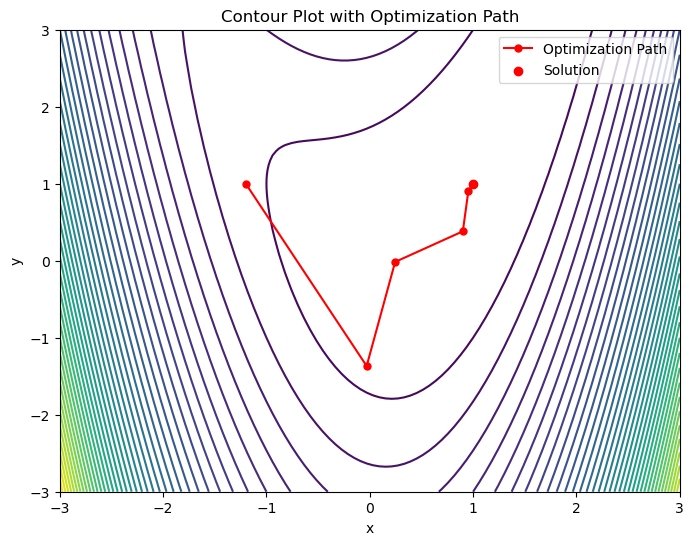

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Multivariate function to minimize."""
    return 100*((x[1] - x[0]**2)**2 + (1-x[0])**2)

def numerical_gradient(f, x, h=1e-6):
    """Compute the gradient of f at x using numerical differentiation."""
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.array(x, dtype=float)
        x_forward[i] += h
        grad[i] = (f(x_forward) - f(x)) / h
    return grad

def numerical_hessian(f, x, h=1e-6):
    """Compute the Hessian matrix of f at x using numerical differentiation."""
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            x_ij = np.array(x, dtype=float)
            x_ij[i] += h
            x_ij[j] += h
            f_ij = f(x_ij)
            
            x_i = np.array(x, dtype=float)
            x_i[i] += h
            f_i = f(x_i)
            
            x_j = np.array(x, dtype=float)
            x_j[j] += h
            f_j = f(x_j)
            
            hessian[i, j] = (f_ij - f_i - f_j + f(x)) / (h**2)
    return hessian

def line_search(f, x, grad, direction, alpha=1, rho=0.8, c=1e-4):
    """Backtracking line search to find an acceptable step size."""
    while f(x + alpha * direction) > f(x) + c * alpha * grad.dot(direction):
        alpha *= rho
    return alpha

def newton_method_optimization_multivariate(f, initial_guess, epsilon=1e-5, Itmax=1000):
    x = np.array(initial_guess, dtype=float)
    path = [x]  # To store the optimization path for plotting
    
    for iteration in range(Itmax):
        grad_x = numerical_gradient(f, x)
        hess_x = numerical_hessian(f, x)
        
        # Check convergence
        if np.linalg.norm(grad_x) / (1 + abs(f(x))) <= epsilon:
            print("Converged after", iteration + 1, "iterations.")
            return x, f(x), iteration + 1, path

        try:
            hess_inv = np.linalg.inv(hess_x)
        except np.linalg.LinAlgError:
            print("Hessian is not invertible; stopping.")
            return None, None, iteration + 1, path
        
        direction = -hess_inv @ grad_x
        step_size = line_search(f, x, grad_x, direction)
        
        x = x + step_size * direction
        path.append(x)  # Add the current point to the path

        if iteration < 10 or iteration >= Itmax - 5:
            print(f"Iteration {iteration + 1}:")
            print("  Search direction:", direction)
            print("  Step length (alpha):", step_size)
            print("  New estimate of solution (x_k+1):", x)

    print("Did not converge within", Itmax, "iterations.")
    return x, f(x), Itmax, path

# Initial guess
x0 = np.array([-1.2, 1])

# Run the Newton's method optimization
solution, f_value, iterations, path = newton_method_optimization_multivariate(f, x0)

# Print the result
# Check if a solution was found before plotting
if solution is not None:
    print("Solution:", solution)
    print("Function value at solution:", f_value)
    print("Total iterations:", iterations)

    # Generate contour plot
    x_vals = np.linspace(-3, 3, 100)
    y_vals = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f([X, Y])

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], 'ro-', markersize=5, label='Optimization Path')
    plt.scatter(solution[0], solution[1], color='red', label='Solution', zorder=5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot with Optimization Path')
    plt.legend()
    plt.show()
else:
    print("Optimization did not converge due to an invertible Hessian.")


Initial point: [0. 0.]
Iteration 1:
  Search direction: [-1.000000e-06  1.999998e+00]
  Step length (alpha): 0.25
  New estimate of solution (x_k+1): [-2.500000e-07  4.999995e-01]
Iteration 2:
  Search direction: [0.99999775 0.49999875]
  Step length (alpha): 0.25
  New estimate of solution (x_k+1): [0.24999919 0.62499919]
Iteration 3:
  Search direction: [0.74999881 0.37499931]
  Step length (alpha): 0.25
  New estimate of solution (x_k+1): [0.43749889 0.71874902]
Iteration 4:
  Search direction: [0.56249911 0.28124948]
  Step length (alpha): 0.25
  New estimate of solution (x_k+1): [0.57812367 0.78906139]
Iteration 5:
  Search direction: [0.42187433 0.21093711]
  Step length (alpha): 0.25
  New estimate of solution (x_k+1): [0.68359225 0.84179567]
Iteration 6:
  Search direction: [0.31640575 0.15820284]
  Step length (alpha): 0.25
  New estimate of solution (x_k+1): [0.76269369 0.88134637]
Iteration 7:
  Search direction: [0.23730431 0.11865213]
  Step length (alpha): 0.25
  New esti

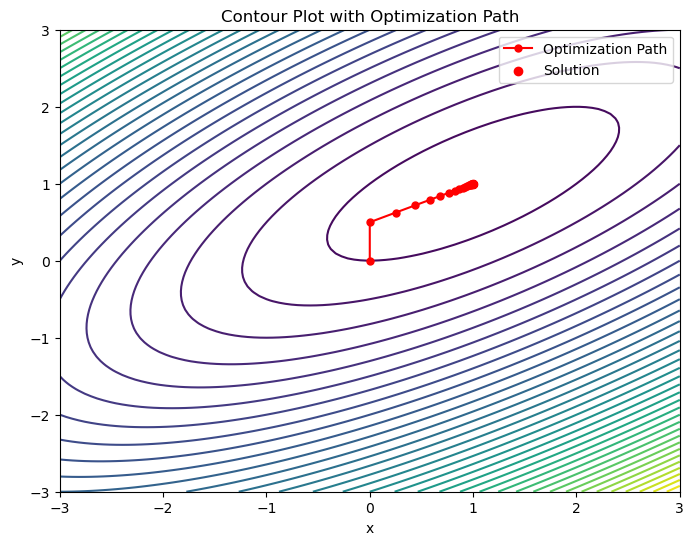

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Multivariate function to minimize."""
    return x[0]**2 + 2*x[1]**2 - 2*x[0]*x[1] - 2*x[1]
    "x[0]**2 + x[1]**2 + x[2]**2"
    "100*((x[1] - x[0]**2)**2 + (1-x[0])**2)"

def numerical_gradient(f, x, h=1e-6):
    """Compute the gradient of f at x using numerical differentiation."""
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.array(x, dtype=float)
        x_forward[i] += h
        grad[i] = (f(x_forward) - f(x)) / h
    return grad

def backtracking_line_search(f, x, grad, direction, alpha=1, rho=0.5, c=1e-4):
    """Perform backtracking line search to find the step length alpha."""
    while f(x + alpha * direction) > f(x) + c * alpha * np.dot(grad, direction):
        alpha *= rho
    return alpha

def quasi_newton_bfgs(f, x0, alpha=1, epsilon=1e-8, Itmax=1000):
    x = np.array(x0, dtype=float)
    B = np.eye(len(x0))  # Initial Hessian approximation as identity matrix
    output_limit = 10  # Output control for initial and final iterations

    # List to store function values and x path for plotting
    f_values = [f(x)]
    x_path = [x.copy()]

    print("Initial point:", x)
    
    for iteration in range(Itmax):
        grad_x = numerical_gradient(f, x)

        # Check convergence criterion
        if np.linalg.norm(grad_x) / (1 + abs(f(x))) <= epsilon:
            print("Converged after", iteration + 1, "iterations.")
            return x, f(x), iteration + 1, f_values, x_path

        # Search direction
        direction = -np.linalg.solve(B, grad_x)  # Solving B * p = -grad_x for p

        # Perform line search to find the optimal step size
        alpha = backtracking_line_search(f, x, grad_x, direction, alpha)

        # Update x
        x_new = x + alpha * direction
        grad_x_new = numerical_gradient(f, x_new)

        # Store the function value and x path for plotting
        f_values.append(f(x_new))
        x_path.append(x_new.copy())

        # Calculate s and y for the BFGS update
        s = x_new - x
        y = grad_x_new - grad_x

        # BFGS update
        if np.dot(y, s) > 1e-10:  # Prevent division by very small numbers
            Bs = B @ s
            B += np.outer(y, y) / np.dot(y, s) - np.outer(Bs, Bs) / np.dot(s, Bs)

        # Print iteration details
        if iteration < output_limit or iteration >= Itmax - 5:
            print(f"Iteration {iteration + 1}:")
            print("  Search direction:", direction)
            print("  Step length (alpha):", alpha)
            print("  New estimate of solution (x_k+1):", x_new)

        # Move to the next iteration
        x = x_new

    print("Did not converge within", Itmax, "iterations.")
    return x, f(x), Itmax, f_values, x_path

# Initial guess
x0 = np.array([0, 0])

# Run the Quasi-Newton method with BFGS update
solution, f_value, iterations, f_values, x_path = quasi_newton_bfgs(f, x0)

# Print the result
if solution is not None:
    print("Solution:", solution)
    print("Function value at solution:", f_value)
    print("Total iterations:", iterations)


# Generate contour plot of f(x)
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Convert x_path to numpy array for easier plotting
x_path = np.array(x_path)
plt.plot(x_path[:, 0], x_path[:, 1], 'ro-', markersize=5, label='Optimization Path')
plt.scatter(solution[0], solution[1], color='red', label='Solution', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Optimization Path')
plt.legend()
plt.show()


Initial point: [ 2. -2.]
Iteration 1:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [-7.50346231e-07  3.12492426e-02]
Iteration 2:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [1.44372331e-07 3.07600715e-02]
Iteration 3:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [1.92065592e-06 2.98046093e-02]
Iteration 4:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [4.41508849e-06 2.84412570e-02]
Iteration 5:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [7.40438872e-06 2.67550519e-02]
Iteration 6:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [1.06467344e-05 2.48447608e-02]
Iteration 7:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [1.39201072e-05 2.28094782e-02]
Iteration 8:
  Step length (alpha): 0.0078125
  New estimate of solution (x_k+1): [1.70482211e-05 2.07378819e-02]
Iteration 9:
  Step length (alpha): 0.0078125
  New estimate 

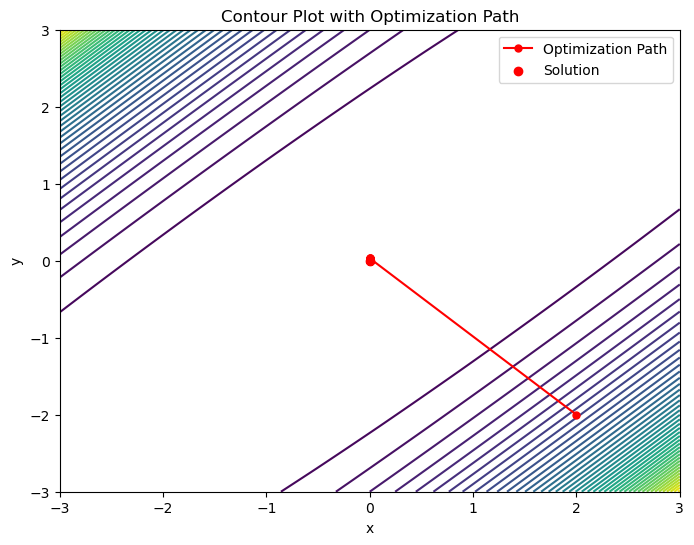

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x[0] - x[1])**4 + x[1]**2

def numerical_gradient(f, x, h=1e-6):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.array(x, dtype=float)
        x_forward[i] += h
        grad[i] = (f(x_forward) - f(x)) / h
    return grad

def backtracking_line_search(f, x, grad, direction, alpha=1, rho=0.5, c=1e-4):
    while f(x + alpha * direction) > f(x) + c * alpha * np.dot(grad, direction):
        alpha *= rho
    return alpha

def conjugate_gradient_method(f, x0, alpha=1, epsilon=1e-8, Itmax=1000):
    x = np.array(x0, dtype=float)
    grad_x = numerical_gradient(f, x)
    direction = -grad_x  # Initial direction
    f_values = [f(x)]  # Track function values
    x_path = [x.copy()]  # Track path for contour plot

    print("Initial point:", x)

    for iteration in range(Itmax):
        # Check convergence criterion
        if np.linalg.norm(grad_x) <= epsilon:
            print("Converged after", iteration + 1, "iterations.")
            return x, f(x), iteration + 1, f_values, x_path

        # Perform line search to find the optimal step size
        alpha = backtracking_line_search(f, x, grad_x, direction, alpha)

        # Update x
        x_new = x + alpha * direction
        grad_x_new = numerical_gradient(f, x_new)

        # Store the function value and path for plotting
        f_values.append(f(x_new))
        x_path.append(x_new.copy())

        # Compute the beta parameter for the Conjugate Gradient update
        beta = np.dot(grad_x_new, grad_x_new) / np.dot(grad_x, grad_x)

        # Update direction
        direction = -grad_x_new + beta * direction

        # Update x and grad_x for the next iteration
        x = x_new
        grad_x = grad_x_new

        # Print iteration details
        if iteration < 10 or iteration >= Itmax - 5:
            print(f"Iteration {iteration + 1}:")
            print("  Step length (alpha):", alpha)
            print("  New estimate of solution (x_k+1):", x)

    print("Did not converge within", Itmax, "iterations.")
    return x, f(x), Itmax, f_values, x_path

# Initial guess
x0 = np.array([2, -2])

# Run the Conjugate Gradient method
solution, f_value, iterations, f_values, x_path = conjugate_gradient_method(f, x0)

# Print the result
if solution is not None:
    print("Solution:", solution)
    print("Function value at solution:", f_value)
    print("Total iterations:", iterations)



# Generate contour plot of f(x)
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Convert x_path to numpy array for easier plotting
x_path = np.array(x_path)
plt.plot(x_path[:, 0], x_path[:, 1], 'ro-', markersize=5, label='Optimization Path')
plt.scatter(solution[0], solution[1], color='red', label='Solution', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Optimization Path')
plt.legend()
plt.show()
